## Final Assignment


Before working on this assignment please read these instructions fully. Use blackboard to submit a link to your repository. 

On blackboard your find the assessment criteria. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find at least two datasets on the web which are related, and that you build an application that visualize these datasets to answer a research question with the broad topic of **health** or **agriculture** in the **region where you were born**. The region can be a city, town or a provence.  

The research question should be a question with a causual nature. For instance questions like: How does independent variable X influence the dependent variable of Y?

The code should be programmed efficiently. Also identify the most critical part and write software test for this part. Take into account the performance of the dataprocessing

### About the data

You can merge these datasets with data from different regions if you like. For instance, you might want to compare the health effect of earhtquacks in Groningen versus Los Angelos USA. 

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with others, so choose appropriate datasets. You are welcome to use datasets of your own as well, but minimual two datasets should be coming from the web and or API's. 

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations in your visualization. 

### Instructions:

Define a research question, select data and code your data acquisition, data processing, data analysis and visualization. Write code to test most critical parts. Use a repository with a commit strategy and write a readme file. 

Write a small document with the following:
- State the region and the domain category that your data sets are about 
- State the research question 
- Justify the chosen data storage and processing approach
- Justify the chosen analysis approach
- Justify the chosen data visualization approach

Upload your document and the link of your repository to black board

<a name='0'></a>
## Part 0: Research question

The research question I want to answer in this assignment is:

Does air pollution cause the pneumonia, bronchitis, emphysema and asthma(respiratory disease)?

<a name='0'></a>
## Part 1: Load the data

Load

air pollution dataset https://data.epa.gov.tw/dataset/stat_p_116/resource/fb4dbfff-f6e9-4bdf-ac16-5914422a60f9

item1:date, item2:region

value1: concentration of total suspended particulate 

value2: concentration of suspended particulate ( less than 2.5 pm )

value3: concentration of suspended particulate ( less than 10 pm )

value4: SO2 concentration

Value5: CO concentration

Value6: NO2 concentration

Value7: the maximum value of O3 concentration per hour

In [1]:
from scipy.stats import norm
import pandas as pd; import numpy as np
from functools import reduce
from scipy import stats
from bokeh.plotting import figure, show
from scipy.stats import norm,iqr,shapiro,normaltest,levene,f_oneway,bartlett
import matplotlib.pyplot as plt   
from bokeh.io import output_notebook, show
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.transform import transform
from bokeh.palettes import Cividis256
from bokeh.models.widgets import Panel, Tabs
import seaborn as sns
# to excuate the df
air_pollution_path = "/Users/kai/Desktop/Hanze/course/Programming/Data_processing/assessments/air_pollution.csv"
ap_df = pd.read_csv(air_pollution_path)
# to rename the column name
ap_df = ap_df.rename(columns={"item1": "year",
                              "item2": "region",
                              "value1": "total particulate matter",
                              "value2": "2.5 particulate matter",
                              "value3": "10 particulate matter",
                              "value4": "SO2 concentration",
                              "value5": "CO concentration",
                              "value6": "NO2 concentration",
                              "value7": "O3 concentration"})
# to choose the correct data. 總計 means to get all region data
ap_df = ap_df[(ap_df.region=="總計")]

# to get the whole year data from 2011 to 2020.
# 100年 is equal to 2011.
ap_df = ap_df[(ap_df.year=="100年")|(ap_df.year=="101年")|
              (ap_df.year=="102年")|(ap_df.year=="103年")|
              (ap_df.year=="104年")|(ap_df.year=="105年")|
              (ap_df.year=="106年")|(ap_df.year=="107年")|
              (ap_df.year=="108年")|(ap_df.year=="109年")]
ap_df = ap_df.replace("...", np.nan).reset_index().drop(columns=["index","region"])
ap_df.year = ap_df.year.str.split("年", n=1 ,expand=True)[0]
ap_df = ap_df.astype({"year":"int",
                      "total particulate matter":"float",
                      "2.5 particulate matter":"float",
                      "10 particulate matter":"float",
                      "SO2 concentration":"float",
                      "CO concentration":"float",
                      "NO2 concentration":"float",
                      "O3 concentration":"float"})
# to change to correct year
ap_df.year = ap_df.year + 1911

In [2]:
ap_df.info()
ap_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      10 non-null     int64  
 1   total particulate matter  10 non-null     float64
 2   2.5 particulate matter    8 non-null      float64
 3   10 particulate matter     10 non-null     float64
 4   SO2 concentration         10 non-null     float64
 5   CO concentration          10 non-null     float64
 6   NO2 concentration         10 non-null     float64
 7   O3 concentration          10 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 768.0 bytes


,year,total particulate matter,2.5 particulate matter,10 particulate matter,SO2 concentration,CO concentration,NO2 concentration,O3 concentration
0,2011,71.3,NaN,54.3,3.76,0.43,15.83,56.96
1,2012,63.2,NaN,50.5,3.29,0.43,14.64,56.36
2,2013,63.3,24.0,53.1,3.45,0.42,14.35,57.74
3,2014,58.1,23.6,52.0,3.40,0.41,14.37,58.36
4,2015,52.7,22.0,47.1,3.13,0.40,13.62,56.13
5,2016,47.0,20.0,42.9,2.97,0.39,13.53,53.89
6,2017,48.6,18.3,44.0,2.88,0.35,12.86,56.43
7,2018,46.3,17.5,42.6,2.71,0.35,12.20,55.34
8,2019,43.1,16.2,35.7,2.30,0.35,11.57,54.91
9,2020,41.4,14.1,30.1,2.14,0.32,10.75,54.77


Load

Cause of death dataset
https://dep.mohw.gov.tw/dos/cp-5069-62791-113.html

In [3]:
cause_of_death_path = "/Users/kai/Desktop/Hanze/course/Programming/Data_processing/assessments/cause_of_death.xlsx"
cd_df = pd.read_excel(io=cause_of_death_path,sheet_name = ["1(1)"] ,header =5,engine= "openpyxl")
cd_df = cd_df["1(1)"].drop(columns = "Unnamed: 0")
cd_df_list = ["cd_df_2008","cd_df_2009","cd_df_2010","cd_df_2011","cd_df_2012",
              "cd_df_2013","cd_df_2014","cd_df_2015","cd_df_2016","cd_df_2017",
              "cd_df_2018","cd_df_2019","cd_df_2020"]

def get_df(cd_df=cd_df, cd_df_list= cd_df_list,choose_cd = "肺炎\nPneumonia"):
    """
    This function is used to get df you want from 2008 to 2020
    cd_df = df, causes of death
    cd_df_list = list, give the name of each df
    return df, the df you choose
    """
    choose_df = []
    # to get the correct dataset for select cause of death
    for i in range (len(cd_df_list)):
        if i != len(cd_df_list)-1:
            # to get column instead of NaN column
            df = cd_df.iloc[:,i*7:3+i*7]

            # to give each row the correct year 
            year = str(df.columns[0])
            df.loc[:,df.columns[0]] = year

            # to rename to correct name of the column
            df = df.rename(columns={df.columns[0]:"year",df.columns[1]:"Causes of death",df.columns[2]:choose_cd})

            # to select the column with Pneumonia
            choose_df.append(df.loc[df.iloc[:,1] == choose_cd])

        else:
            # to get column instead of NaN column (to the last part of the data)
            df = cd_df.iloc[:,i*7:-2]

            # to give each row the correct year 
            year = str(df.columns[0])
            df.loc[:,df.columns[0]] = year

            # to rename to correct name of the column
            df = df.rename(columns={df.columns[0]:"year",df.columns[1]:"Causes of death",df.columns[2]:choose_cd})

            # to select the column with Pneumonia
            choose_df.append(df.loc[df.iloc[:,1] == choose_cd])
    result = pd.concat(choose_df)
    return result.drop(columns=result.columns[1])

Pneumonia_cd_df = get_df(choose_cd = "肺炎\nPneumonia")
lower_respiratory_diseases_cd_df = get_df(choose_cd = "慢性下呼吸道疾病\nChronic lower respiratory diseases")
lung_diseases_cd_df = get_df(choose_cd = "肇因於吸入外物之肺部病況（塵肺症及肺炎除外）\nLung diseases due to external agents (except Pneumoconiosis and Pneumonia) ")
Pneumoconioses_cd_df = get_df(choose_cd = "塵肺症\nPneumoconioses")
total_cd_df = get_df(choose_cd = "所有死亡原因\nAll causes of death")

data_frames = [Pneumonia_cd_df,
               lower_respiratory_diseases_cd_df,
               lung_diseases_cd_df,
               Pneumoconioses_cd_df,
               total_cd_df]
combine_cd_df = reduce(lambda left,right: pd.merge(left,right,on=['year'],how='outer'), data_frames)
combine_cd_df = combine_cd_df.rename(columns={combine_cd_df.columns[1]:"Pneumonia",
                                              combine_cd_df.columns[2]:"Chronic lower respiratory diseases",
                                              combine_cd_df.columns[3]:"Lung diseases",
                                              combine_cd_df.columns[4]:"Pneumoconioses",
                                              combine_cd_df.columns[5]:"All causes of death"})
combine_cd_df = combine_cd_df.astype("float").astype({"year":"int"})
combine_cd_df

,year,Pneumonia,Chronic lower respiratory diseases,Lung diseases,Pneumoconioses,All causes of death
0,2008,8661.0,5374.0,603.0,173.0,142283.0
1,2009,8358.0,4955.0,544.0,184.0,142240.0
2,2010,8909.0,5197.0,550.0,204.0,144709.0
3,2011,9047.0,5984.0,582.0,202.0,152030.0
4,2012,9314.0,6326.0,583.0,165.0,153823.0
5,2013,9042.0,5959.0,562.0,176.0,154374.0
6,2014,10353.0,6428.0,570.0,187.0,162886.0
7,2015,10761.0,6383.0,589.0,191.0,163574.0
8,2016,12212.0,6787.0,646.0,NaN,172418.0
9,2017,12480.0,6260.0,616.0,NaN,171857.0


In [4]:
combine_cd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                13 non-null     int64  
 1   Pneumonia                           13 non-null     float64
 2   Chronic lower respiratory diseases  13 non-null     float64
 3   Lung diseases                       13 non-null     float64
 4   Pneumoconioses                      9 non-null      float64
 5   All causes of death                 13 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 728.0 bytes


<a name='0'></a>
## Part 2: Check the missing data and interpolate.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype?

In [5]:
print(ap_df.isna().sum())
print("\nThere are {:.3f} % of missing data in air pollution.\n".format(ap_df.isna().sum().sum() / ap_df.size * 100))
print(combine_cd_df.isna().sum())
print("\nThere are {:.3f} % of missing data in causes of death.".format(combine_cd_df.isna().sum().sum() / combine_cd_df.size * 100))

year                        0
total particulate matter    0
2.5 particulate matter      2
10 particulate matter       0
SO2 concentration           0
CO concentration            0
NO2 concentration           0
O3 concentration            0
dtype: int64

There are 2.500 % of missing data in air pollution.

year                                  0
Pneumonia                             0
Chronic lower respiratory diseases    0
Lung diseases                         0
Pneumoconioses                        4
All causes of death                   0
dtype: int64

There are 5.128 % of missing data in causes of death.


In [6]:
# I want to use the Kriging to interpolate the air pollution missing data.
# https://www.nature.com/articles/7500338
# I cannot find the method for Kriging and the data is not enough (no x , y, z data) to use Kriging, too.
# Some of the people use linear for inpolate the data for year.
# https://machinelearningmastery.com/resample-interpolate-time-series-data-python/
ap_df['2.5 particulate matter'] = ap_df["2.5 particulate matter"].interpolate(method='linear',limit_direction="backward")
print(ap_df.info())

# https://rdo.psu.ac.th/sjstweb/journal/36-2/36-2-15.pdf
# interpolate the death number by cubicspline
combine_cd_df["Pneumoconioses"] = combine_cd_df["Pneumoconioses"].interpolate(method='cubicspline')
print(combine_cd_df.info())

print("\nAccording to the research question air pollution is the independent variable (cause) , and respiratory disease is the dependent variable (effect)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      10 non-null     int64  
 1   total particulate matter  10 non-null     float64
 2   2.5 particulate matter    10 non-null     float64
 3   10 particulate matter     10 non-null     float64
 4   SO2 concentration         10 non-null     float64
 5   CO concentration          10 non-null     float64
 6   NO2 concentration         10 non-null     float64
 7   O3 concentration          10 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 768.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                13 non-null     

In [7]:
combine_cd_df["Total of respiratory diseases"] = combine_cd_df.iloc[:, 1:-2].sum(axis=1)
combine_cd_df = combine_cd_df.drop(columns = combine_cd_df.columns[1:-2],index = [0,1,2]).reset_index().drop(columns = "index")
combine_cd_df["Percentage of respiratory diseases"] = (combine_cd_df["Total of respiratory diseases"] / combine_cd_df["All causes of death"])
combine_cd_df = combine_cd_df.drop(columns = combine_cd_df.columns[1:3])
ap_cd_df = ap_df.merge(combine_cd_df, on= "year",how = "inner")

In [8]:
# Create a heatmap to check for correlations among variables.
output_notebook()
correlation = ap_cd_df.iloc[:,1:].corr()
y_range = (list(reversed(correlation.columns)))
x_range = (list(correlation.index))
dfc = pd.DataFrame(correlation.stack(), columns=['r']).reset_index()
source = ColumnDataSource(dfc)

#create colormapper 
mapper = LinearColorMapper(palette=Cividis256, low=dfc.r.min(), high=dfc.r.max())

p = figure(title="Correlation heatmap with research question", plot_width=500, plot_height=450,x_range=x_range, y_range=y_range, x_axis_location="above", toolbar_location=None)

#use mapper to fill the rectangles in the plot
p.rect(x="level_0", y="level_1", width=1, height=1, source=source,line_color=None, fill_color=transform('r', mapper))

#create and add colorbar to the right
color_bar = ColorBar(color_mapper=mapper, location=(0, 0),ticker=BasicTicker(desired_num_ticks=2*len(x_range)), 
                     formatter=PrintfTickFormatter(format="%.1f"))
p.add_layout(color_bar, 'right')

#draw axis
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10px"
p.axis.major_label_standoff = 1
p.xaxis.major_label_orientation = 1
#show
show(p)

Loading BokehJS ...

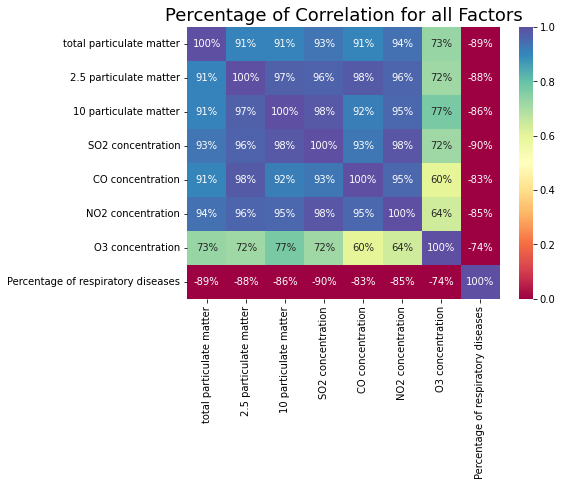

In [9]:
#with seaborn
plt.rcParams["figure.figsize"] = (7, 5)
cmap = sns.color_palette("Spectral", as_cmap=True)
plt.title('Percentage of Correlation for all Factors', fontsize=18)
sns.heatmap(ap_cd_df.iloc[:,1:].corr(), annot = True, cmap=cmap, fmt='.0%', vmin=0, vmax=1)
plt.show()

In [10]:
100 * ap_cd_df.iloc[:,1:].corr()

,total particulate matter,2.5 particulate matter,10 particulate matter,SO2 concentration,CO concentration,NO2 concentration,O3 concentration,Percentage of respiratory diseases
total particulate matter,100.000000,90.892645,90.721139,93.125608,90.619809,93.796291,72.715230,-88.754478
2.5 particulate matter,90.892645,100.000000,96.514182,96.171644,98.041877,95.845880,71.679581,-88.173350
10 particulate matter,90.721139,96.514182,100.000000,98.104223,91.630384,95.408831,77.067055,-86.480573
SO2 concentration,93.125608,96.171644,98.104223,100.000000,92.914724,98.469124,71.701727,-89.650305
CO concentration,90.619809,98.041877,91.630384,92.914724,100.000000,95.422444,60.107395,-82.958862
NO2 concentration,93.796291,95.845880,95.408831,98.469124,95.422444,100.000000,63.822415,-85.452417
O3 concentration,72.715230,71.679581,77.067055,71.701727,60.107395,63.822415,100.000000,-74.337529
Percentage of respiratory diseases,-88.754478,-88.173350,-86.480573,-89.650305,-82.958862,-85.452417,-74.337529,100.000000


<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normally distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

In [11]:
# check dependent variable is normaly distributed or not
def Q_Q_Plot(data,ap_cd_df):
    """
    to make a QQ plot
    data = the data you want to get form data frame
    ap_cd_df = data frame
    return QQ plot
    """
    y = ap_cd_df[data]
    output_notebook()
    n = len(y) 
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML, sigma_ML, s_ML = np.mean(y) , np.std(y),np.std(y,ddof=1)
    print('Estimation method: Maximum Likelihood')
    print('mu = ',mu_ML,', sigma = ',sigma_ML)
        
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu_ML)/s_ML

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper, CI_lower = z_th + 1.96 * SE_z_th, z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    p = figure(height=500, title= data + " Q-Q plot ( Maximum Likelihood )" )
    p.scatter(z_th, z_i, line_color="black", line_width=4, alpha=0.7,legend_label = "experimental data")
    p.line(z_th, z_th, line_color="red", line_width=4, alpha=0.7,legend_label = "normal line")
    p.line(z_th, CI_upper, line_color="blue", line_width=4, alpha=0.7,legend_label = "95% CI")
    p.line(z_th, CI_lower, line_color="blue", line_width=4, alpha=0.7)
    p.xaxis.axis_label = 'Theoretical quantiles, Z(i)'
    p.yaxis.axis_label = 'Sample quantiles, Zi'
    p.legend.location = "bottom_right"
    return p

def plot_QQplot_tab():
    """
    This function is used to return QQ plot for all data.
    return tab with each QQ plot
    """
    p1 = Q_Q_Plot("total particulate matter",ap_cd_df)
    p2 = Q_Q_Plot("2.5 particulate matter",ap_cd_df)
    p3 = Q_Q_Plot("10 particulate matter",ap_cd_df)
    p4 = Q_Q_Plot("SO2 concentration",ap_cd_df)
    p5 = Q_Q_Plot("CO concentration",ap_cd_df)
    p6 = Q_Q_Plot("NO2 concentration",ap_cd_df)
    p7 = Q_Q_Plot("O3 concentration",ap_cd_df)
    p8 = Q_Q_Plot("Percentage of respiratory diseases",ap_cd_df)
    tab1 = Panel(child=p1, title="PM total ")
    tab2 = Panel(child=p2, title="PM 2.5 ")
    tab3 = Panel(child=p3, title="PM 10 ")
    tab4 = Panel(child=p4, title="SO\u2082")
    tab5 = Panel(child=p5, title="CO")
    tab6 = Panel(child=p6, title="NO\u2082")
    tab7 = Panel(child=p7, title="O\u2083")
    tab8 = Panel(child=p8, title="Respiratory diseases")
    tabs = Tabs(tabs=[ tab1, tab2,tab3,tab4,tab5,tab6,tab7,tab8])
    return tabs
show(plot_QQplot_tab())
print('We can check the data by Q-Q plot. The data is besides the normal line.')

Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  53.5 , sigma =  9.49441941352919


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  20.369999999999997 , sigma =  3.492577844515423


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  45.230000000000004 , sigma =  7.449167738747731


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  3.0029999999999997 , sigma =  0.48682748484447746


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  0.38499999999999995 , sigma =  0.03748332962798263


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  13.372 , sigma =  1.464457578764233


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  56.089 , sigma =  1.3175617632581784


Loading BokehJS ...

Estimation method: Maximum Likelihood
mu =  0.1109073687466271 , sigma =  0.007156747666423159


We can check the data by Q-Q plot. The data is besides the normal line.


In [12]:
def histogram(y):
    p = figure(height=500, title="Distribution of respiratory diseases ( Maximum Likelihood )")
    x = np.linspace(min(y) - 0.012, max(y) + 0.007, 100)
    mu_ML, mu_R, sigma_ML, s_ML = np.mean(y),np.median(y), np.std(y), np.std(y,ddof=1)
    hist, edges = np.histogram(y, density=True,bins = 5)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="pink",
           line_color="white", alpha=0.5,legend_label = "Respiratory diseases")
    pdf = norm.pdf(x, mu_ML, s_ML)
    p.line(x, pdf, line_color="red", line_width=4, alpha=0.7,legend_label = "Normal line")
    p.xaxis.axis_label = 'Respiratory diseases percentage'
    p.yaxis.axis_label = 'Probobility'
    p.ray(x=mu_ML,y=[0], length=0, angle=np.pi/2, color = "blue" ,line_width=3, legend_label = "ML mu")
    p.ray(x=mu_R ,y=[0], length=0, angle=np.pi/2, color = "green",line_width=3, legend_label = "Robust mu")
    p.legend.location = "top_right"
    return show(p)
histogram(ap_cd_df["Percentage of respiratory diseases"])
print("Although the histogram does not look normality and not symmetric, the median and mean are nearly the same. \nWe can use the other method to make sure whether it is normal distribution or not.")


Although the histogram does not look normality and not symmetric, the median and mean are nearly the same. 
We can use the other method to make sure whether it is normal distribution or not.


In [13]:
# ANOVA assumes that the dependent variable is normaly distributed
print(shapiro(ap_cd_df["Percentage of respiratory diseases"]))
print(shapiro(ap_cd_df["total particulate matter"]))
print(shapiro(ap_cd_df["2.5 particulate matter"]))
print(shapiro(ap_cd_df["10 particulate matter"]))
print(shapiro(ap_cd_df["SO2 concentration"]))
print(shapiro(ap_cd_df["CO concentration"]))
print(shapiro(ap_cd_df["NO2 concentration"]))
print(shapiro(ap_cd_df["O3 concentration"]))
print("p-value is above 0.05, so it is normal distributed.")

# ANOVA also assumes homogeneity of variance
print(bartlett(ap_cd_df["Percentage of respiratory diseases"],ap_cd_df["total particulate matter"],ap_cd_df["2.5 particulate matter"],
               ap_cd_df["10 particulate matter"],ap_cd_df["SO2 concentration"],ap_cd_df["CO concentration"],
               ap_cd_df["NO2 concentration"],ap_cd_df["O3 concentration"]))
print("p-value is less than 0.05, so the groups do not have equal variance.")

# ANOVA also assumes that the observations are independent of each other.
print("Bartlett's test is used to check that variances are equal for all samples when your data comes from normal distribution.")
print("As the previous answer, the respiratory diseases is normal distribution.")
print("So, I use the Bartlett's test. However, these groups do not contain equal variance")
print("I cannot use ANOVA because of unequal variance.")

ShapiroResult(statistic=0.9617905020713806, pvalue=0.8060815930366516)
ShapiroResult(statistic=0.9296799302101135, pvalue=0.44475141167640686)
ShapiroResult(statistic=0.881583571434021, pvalue=0.13606634736061096)
ShapiroResult(statistic=0.9270083904266357, pvalue=0.41912007331848145)
ShapiroResult(statistic=0.9651144742965698, pvalue=0.8422271609306335)
ShapiroResult(statistic=0.8959866762161255, pvalue=0.19784322381019592)
ShapiroResult(statistic=0.9764270782470703, pvalue=0.9432258605957031)
ShapiroResult(statistic=0.9797163605690002, pvalue=0.9636321663856506)
p-value is above 0.05, so it is normal distributed.
BartlettResult(statistic=255.88405900009707, pvalue=1.548608828853806e-51)
p-value is less than 0.05, so the groups do not have equal variance.
Bartlett's test is used to check that variances are equal for all samples when your data comes from normal distribution.
As the previous answer, the respiratory diseases is normal distribution.
So, I use the Bartlett's test. However,

<a name='2'></a>
## Part 4: Try another way to solve the problem

In [14]:
def plot_regression_line(x_df,y_df):
    """
    x_df: df, for x axis
    y_df: df, for y axis
    return: regression line with scatter plot.
    """
    #the data
    x = np.array(x_df.tolist())
    y = np.array(y_df.tolist())
    # determine best fit line
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    y_predicted = [slope*i + intercept  for i in x]
    data = {"respiratory": x_df,"pollution":y_df,"regression_line":y_predicted }
    source = ColumnDataSource(data=data)
    # plot it
    Tooltips = [("Respiratory diseases percentage","@respiratory"),("Air pollution","@pollution")]
    fig = figure(x_axis_label="Percentage of respiratory diseases",y_axis_label="Concentration",height=400,
                 title="Respiratory diseases V.S. air pollution regression line\np-value ={:.3f}, R = {:.3f}, R\u2082 = {:.3f}, standard error = {:.3f}".format(p,r,r**2,std_err),
                 toolbar_location=None,tools="hover",tooltips=Tooltips)
    fig.circle("respiratory","pollution",source = source)
    fig.line("respiratory","regression_line",color='red',legend_label='y='+str(round(slope,2))+'x+'+str(round(intercept,2)),source = source)
    return fig

def plot_regression_tab():
    respiratory_diseases = ap_cd_df["Percentage of respiratory diseases"]
    p1 = plot_regression_line(respiratory_diseases,ap_cd_df["total particulate matter"])
    p2 = plot_regression_line(respiratory_diseases,ap_cd_df["2.5 particulate matter"])
    p3 = plot_regression_line(respiratory_diseases,ap_cd_df["10 particulate matter"])
    p4 = plot_regression_line(respiratory_diseases,ap_cd_df["SO2 concentration"])
    p5 = plot_regression_line(respiratory_diseases,ap_cd_df["CO concentration"])
    p6 = plot_regression_line(respiratory_diseases,ap_cd_df["NO2 concentration"])
    p7 = plot_regression_line(respiratory_diseases,ap_cd_df["O3 concentration"])
    tab1 = Panel(child=p1, title="PM total ")
    tab2 = Panel(child=p2, title="PM 2.5 ")
    tab3 = Panel(child=p3, title="PM 10 ")
    tab4 = Panel(child=p4, title="SO\u2082")
    tab5 = Panel(child=p5, title="CO")
    tab6 = Panel(child=p6, title="NO\u2082")
    tab7 = Panel(child=p7, title="O\u2083")
    tabs = Tabs(tabs=[ tab1, tab2,tab3,tab4,tab5,tab6,tab7])
    return tabs
show(plot_regression_tab())
print("All of the P-value are lower than 0.05, we can reject the null hypothesis.")
print("We can conclude that the regression are significant and predictive.")
print("The R\u00b2 for the PM total, PM 2.5, SO\u2082 are higher than 0.75.")
print("Although some regression line of R\u00b2 are really high, and can help us to predictive other value.")
print("The standard errors are also high in these line.")
print("In conclusion, there is a relationship between respiratory diseases and air pollution(PM total, PM 2.5, SO\u2082)")
print("The relationship is negative correlation.")

All of the P-value are lower than 0.05, we can reject the null hypothesis.
We can conclude that the regression are significant and predictive.
The R² for the PM total, PM 2.5, SO₂ are higher than 0.75.
Although some regression line of R² are really high, and can help us to predictive other value.
The standard errors are also high in these line.


In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
ap_cd_df = ap_cd_df.rename(columns={"total particulate matter": "total",
                                    "2.5 particulate matter": "pm25",
                                    "SO2 concentration": "SO2",
                                    "Percentage of respiratory diseases": "respiratory"})
my_model = smf.ols(formula='respiratory ~ total+pm25+SO2', data=ap_cd_df).fit()
print(my_model.summary())
print("We find coefficient is nearly zero.")
print("It means the linear regression model wasn't able to find a linear relationship between the dependent variable and independent variable.")
print("We cannot find the data to prove 'air pollution cause respiratory disease in these dataset'.")
print("So, there is no significant evidance to prove it.")

                            OLS Regression Results                            
Dep. Variable:            respiratory   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     9.586
Date:                Mon, 31 Jan 2022   Prob (F-statistic):             0.0105
Time:                        00:11:44   Log-Likelihood:                 43.991
No. Observations:                  10   AIC:                            -79.98
Df Residuals:                       6   BIC:                            -78.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1501      0.008     19.730      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
